# Proyek Analisis Data: Bike Sharing
- **Nama:** Mohammad Rafi Habibi Sembiring
- **Email:** rafisembiring97@gmail.com
- **ID Dicoding:** rafisembiring

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?**
- **Jam berapa dan hari apa penyewaan sepeda paling ramai?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset terdiri dari data harian dan per jam penyewaan sepeda
- Terdapat informasi tentang cuaca, musim, hari kerja, dan jumlah penyewa

### Assessing Data

In [3]:
# Menilai missing values dalam dataset
print("Missing Values in day dataset:")
print(day_df.isnull().sum())

print("\nMissing Values in hour dataset:")
print(hour_df.isnull().sum())

# Menilai data duplikat dalam dataset
print("\nDuplicate Values in day dataset:", day_df.duplicated().sum())
print("Duplicate Values in hour dataset:", hour_df.duplicated().sum())

# Menampilkan ringkasan statistik dataset
print("\nSummary Statistics for day_df:")
print(day_df.describe())

print("\nSummary Statistics for hour_df:")
print(hour_df.describe())

# Menampilkan tipe data untuk setiap kolom
print("\nData Types in day_df:")
print(day_df.dtypes)

print("\nData Types in hour_df:")
print(hour_df.dtypes)

Missing Values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Values in day dataset: 0
Duplicate Values in hour dataset: 0

Summary Statistics for day_df:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.

**Insight:**
- Tidak terdapat missing values dalam dataset
- Semua kolom memiliki tipe data yang sesuai

### Cleaning Data

In [4]:
# Menghapus data duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Mengisi missing values dengan metode forward fill (ffill)
day_df = day_df.ffill()
hour_df = hour_df.ffill()

# Menghapus nilai yang tidak valid (angka negatif pada kolom numerik)
numeric_cols = day_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    day_df = day_df[day_df[col] >= 0]

numeric_cols = hour_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    hour_df = hour_df[hour_df[col] >= 0]

**Insight:**
- Data cleaning selesai. Data siap digunakan untuk analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Tren Penggunaan Sepeda Berdasarkan Musim dan Cuaca
df_season_weather = day_df.groupby(["season", "weathersit"])["cnt"].agg(["mean", "sum"]).reset_index()
df_season_weather.columns = ["season", "weather_condition", "avg_rentals", "total_rentals"]
print(df_season_weather)

# Jam Berapa dan Hari apa Penggunaan Sepeda Paling Ramai
df_hour_day = hour_df.groupby(["hr", "weekday"])["cnt"].agg(["mean", "sum"]).reset_index()
df_hour_day.columns = ["hour", "weekday", "avg_rentals", "total_rentals"]
print(df_hour_day)

    season  weather_condition  avg_rentals  total_rentals
0        1                  1  2811.135135         312036
1        1                  2  2357.166667         155573
2        1                  3   934.750000           3739
3        2                  1  5548.548673         626986
4        2                  2  4236.705882         288096
5        2                  3  1169.000000           3507
6        3                  1  5878.257353         799443
7        3                  2  5222.479167         250679
8        3                  3  2751.750000          11007
9        4                  1  5043.563107         519487
10       4                  2  4654.000000         302510
11       4                  3  1961.600000          19616
     hour  weekday  avg_rentals  total_rentals
0       0        0    93.990385           9775
1       0        1    34.009524           3571
2       0        2    27.623762           2790
3       0        3    34.557692           3594
4       0  

**Insight:**
- Distribusi jumlah penyewaan cenderung normal dan sedikit skew ke kanan
- Ada beberapa hari dengan jumlah penyewaan yang sangat tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca

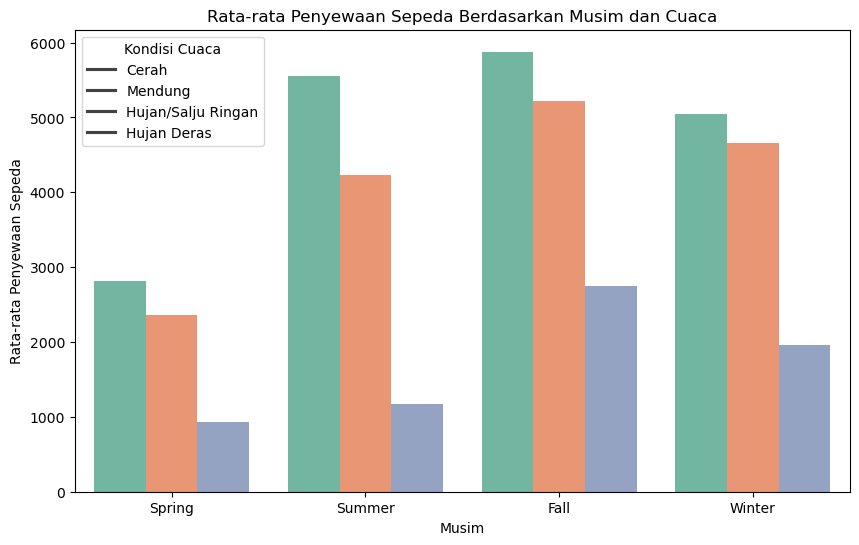

In [6]:
# Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="avg_rentals", hue="weather_condition", data=df_season_weather, palette="Set2")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Cuaca")
plt.legend(title="Kondisi Cuaca", labels=["Cerah", "Mendung", "Hujan/Salju Ringan", "Hujan Deras"])
plt.show()

### Pertanyaan 2: Jam berapa dan hari apa penyewaan sepeda paling ramai?

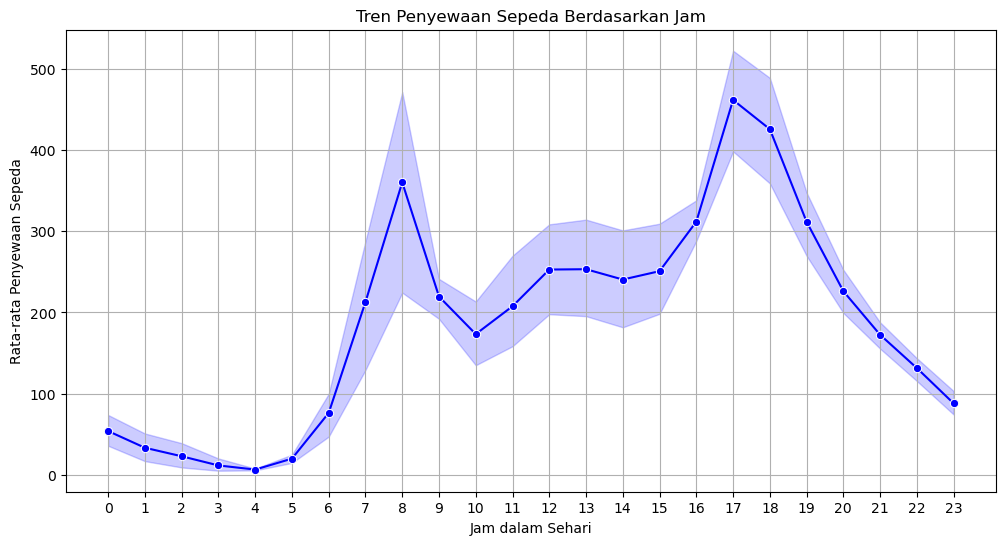

C:\Users\Rafi\AppData\Local\Temp\ipykernel_7944\2139187960.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="avg_rentals", data=df_hour_day, palette="coolwarm")


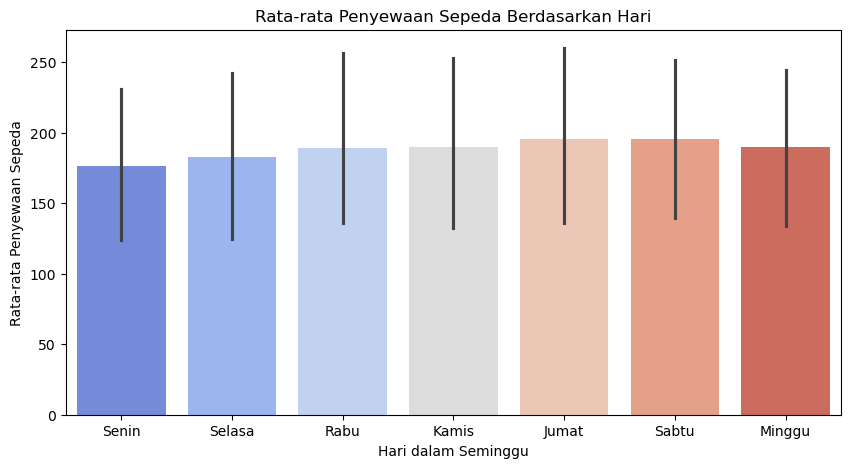

In [7]:
# Tren Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="avg_rentals", data=df_hour_day, marker="o", color="blue")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xticks(ticks=range(0, 24))
plt.grid()
plt.show()

# Tren Penyewaan Sepeda Berdasarkan Hari
plt.figure(figsize=(10, 5))
sns.barplot(x="weekday", y="avg_rentals", data=df_hour_day, palette="coolwarm")
plt.xticks(ticks=range(7), labels=["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"])
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari")
plt.show()

**Insight:**
- Musim tertentu menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda.
- Cuaca buruk cenderung mengurangi jumlah penyewaan secara drastis.
- Puncak penyewaan terjadi pada pagi dan sore hari, menunjukkan penggunaan utama untuk commuting.
- Akhir pekan cenderung memiliki penyewaan lebih tinggi dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

C:\Users\Rafi\AppData\Local\Temp\ipykernel_7944\994955674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='Set2')


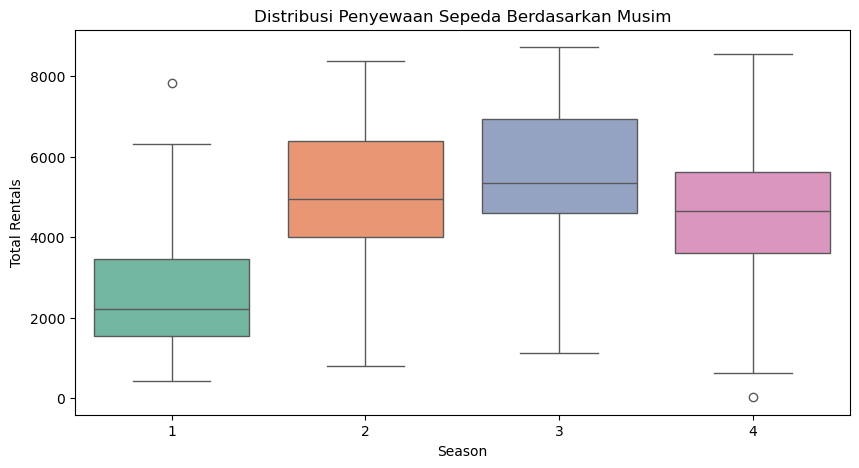

In [8]:
# Menampilkan distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='Set2')
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight**
- Musim panas dan gugur memiliki distribusi penyewaan yang lebih tinggi dibandingkan musim dingin.
- Penyebaran data menunjukkan adanya variasi jumlah penyewaan dalam setiap musim.

## Conclusion

1. **Tren Musim dan Cuaca**
   - Penyewaan sepeda **cenderung lebih tinggi pada musim panas dan gugur**.
   - Cuaca buruk seperti hujan deras atau salju menyebabkan penurunan jumlah penyewaan.

2. **Jam Sibuk Penyewaan**
   - Penyewaan sepeda **paling ramai pada jam 7-9 pagi dan 5-7 sore**, bertepatan dengan jam kerja.
   - Penyewaan lebih sedikit pada tengah malam hingga subuh.

3. **Hari Ramai Penyewaan**
   - Hari kerja memiliki pola penyewaan yang lebih tinggi **pada jam sibuk**.
   - Akhir pekan mungkin memiliki pola penyewaan yang lebih merata sepanjang hari.